In [14]:
'''
In this notebook, based off of the VisualCreditCard book, we will be implementing machine learning.
The purpose of this is to help the machine to better distinguish frand from non-fraud/normal transactions.
I will be implementing 2 different machine leanring algorithms. Random Forest and Isolation Forest. 

Both algorithm will be running twice through two different data sets. One which has a broad view, big, 
and another which has a much more narrow view, small, to see if it will help the algorithms better pinpoint
fraud transactions.

August 9. 2020
aharris26@live.esu.edu
Arlyn Harris
'''
#Python packages to anaylze and view the dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import time

#Machine learning packages to help evaluate the results
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,confusion_matrix

#Supervised machine learning: Random Forest
from sklearn.ensemble import RandomForestClassifier

#Unsupervised machine learning : Isolation Forest
from sklearn.ensemble import IsolationForest

In [15]:
#Import and peak of data set
credit = pd.read_csv("C:\\Users\\arlyn\\Documents\\ESU\\CreditCardFraudIntern\\creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#Seperate into two categories (just in case)
fraud = credit[credit["Class"]==1]
nonfraud = credit[credit["Class"]==0]

In [17]:
#We will now split the data
#Lable used for Random Forest and verifying prediction in Isolation Forest
target = credit['Class']

#Big dataset for the ML
big = credit.drop(["Time", "Amount", "Class"], axis=1)

#Small dataset for the ML
small = credit[['V1', 'V2', 'V3','V4','V7','V8', 'V9','V10','V11','V12','V14','V16', 'V17','V18']]

Random Forest ML Algorithm
The accuracy is:  0.9996137776061234
The Precision is:  0.9876543209876543
The Recall is:  0.7920792079207921
The F1-Score is:  0.8791208791208791

Number of errors:  22

Time elapsed in seconds:  212.32897901535034


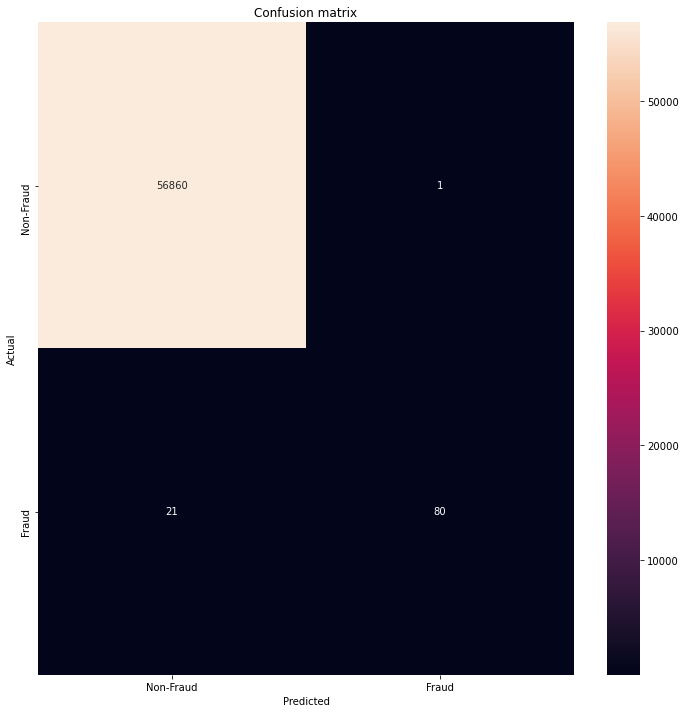

In [18]:
#Random Forest Implementation - big data
RF = RandomForestClassifier()

start = time.time()
#BIG data
#Split the data into train and test -- Using the 80/20 rule for split
x_train, x_test, y_train, y_test = train_test_split(big, target, test_size=0.2)

#Train the model
RF.fit(x_train, y_train)

#Input what the ML predicted from the test set
yPred = RF.predict(x_test)

#Evaluating the ML
no_fraud = len(fraud)
no_error = (yPred != y_test).sum()
end = time.time() 

#Printing results
accu = accuracy_score(y_test, yPred)
prec = precision_score(y_test, yPred)
recall = recall_score(y_test, yPred)
f1 = f1_score(y_test, yPred)
total = end-start

print("Random Forest ML Algorithm")
print("The accuracy is: ", accu)
print("The Precision is: ", prec)
print("The Recall is: ", recall)
print("The F1-Score is: ", f1)
print("\nNumber of errors: ", no_error)
print("\nTime elapsed in seconds: ", total)

#printing the confusion matrix for better visuals
classes = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
#I'll usually print the shape of the test class to make sure that all the values in the heatmap above are accounted for.
x_test.shape

(56962, 28)

Random Forest ML Algorithm
The accuracy is:  0.9995435553526912
The Precision is:  0.9058823529411765
The Recall is:  0.8105263157894737
The F1-Score is:  0.8555555555555556

Number of errors:  26

Time elapsed in seconds:  112.71508288383484


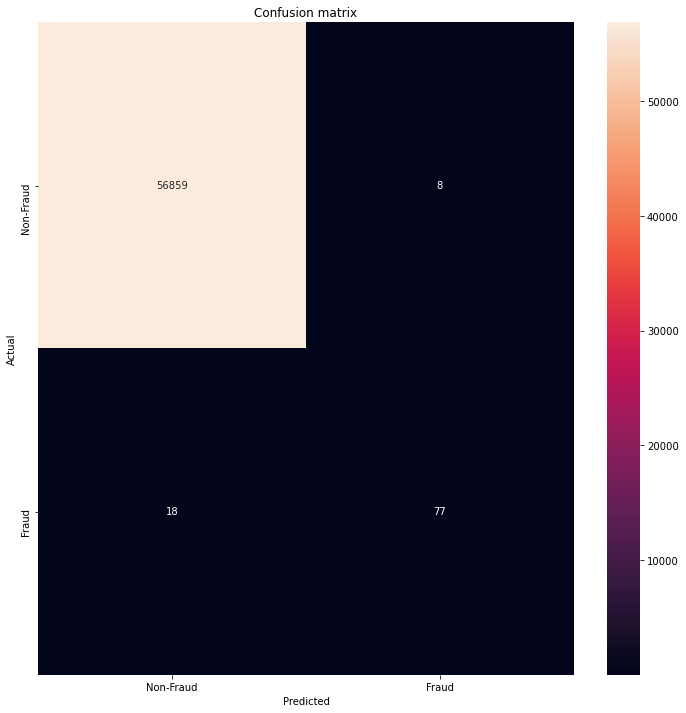

In [20]:
#Random Forest Implementation - small data

start = time.time()

#Split the data into train and test -- Using the 80/20 rule for split
x_train, x_test, y_train, y_test = train_test_split(small, target, test_size=0.2)

#Train the model
RF.fit(x_train, y_train)

#Input what the ML predicted from the test set
yPred = RF.predict(x_test)

#Evaluating the ML
no_fraud = len(fraud)
no_error = (yPred != y_test).sum()
end = time.time()

#Printing results
accu = accuracy_score(y_test, yPred)
prec = precision_score(y_test, yPred)
recall = recall_score(y_test, yPred)
f1 = f1_score(y_test, yPred)
total = end - start

print("Random Forest ML Algorithm")
print("The accuracy is: ", accu)
print("The Precision is: ", prec)
print("The Recall is: ", recall)
print("The F1-Score is: ", f1)
print("\nNumber of errors: ", no_error)
print("\nTime elapsed in seconds: ", total)

#printing the confusion matrix for better visuals
classes = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
x_test.shape

(56962, 14)

Isolation Forest ML Algorithm
The accuracy is:  0.9696601558248217
The Precision is:  0.044494130799329235
The Recall is:  0.8089430894308943
The F1-Score is:  0.0843488396736251

Number of errors:  8641

Time elapsed in seconds:  30.196098566055298


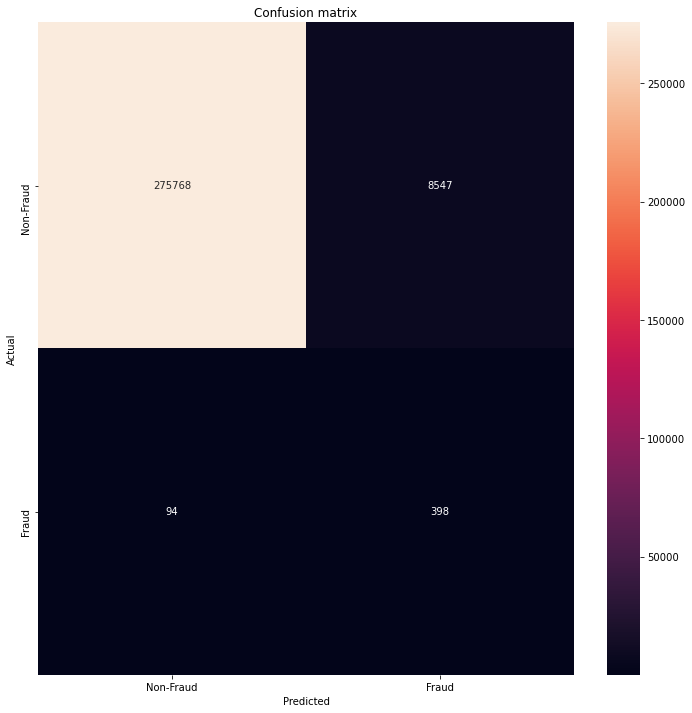

In [22]:
#Isolation Forest Implementation - big data

#Set up the algorithm
IFA = IsolationForest()

start = time.time()
#Train the model on the whole dataset
IFA.fit(big)

scores_pred = IFA.decision_function(big)

#Get the model prediction
yPred = IFA.predict(big)

#Classify the results
yPred[yPred == 1] = 0
yPred[yPred == -1] = 1

#Count the number of  values that were wrong
error = (yPred != target).sum()
end = time.time()

#Evaluate the results
accu = accuracy_score(target, yPred)
prec = precision_score(target, yPred)
recall = recall_score(target, yPred)
f1 = f1_score(target, yPred)
total = end-start

print("Isolation Forest ML Algorithm")
print("The accuracy is: ", accu)
print("The Precision is: ", prec)
print("The Recall is: ", recall)
print("The F1-Score is: ", f1)
print("\nNumber of errors: ", error)
print("\nTime elapsed in seconds: ", total)

#printing the confusion matrix for better visuals
classes = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(target, yPred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Isolation Forest ML Algorithm
The accuracy is:  0.946918439504647
The Precision is:  0.028193548387096774
The Recall is:  0.8882113821138211
The F1-Score is:  0.05465232616308154

Number of errors:  15118

Time elapsed in seconds:  21.969682216644287


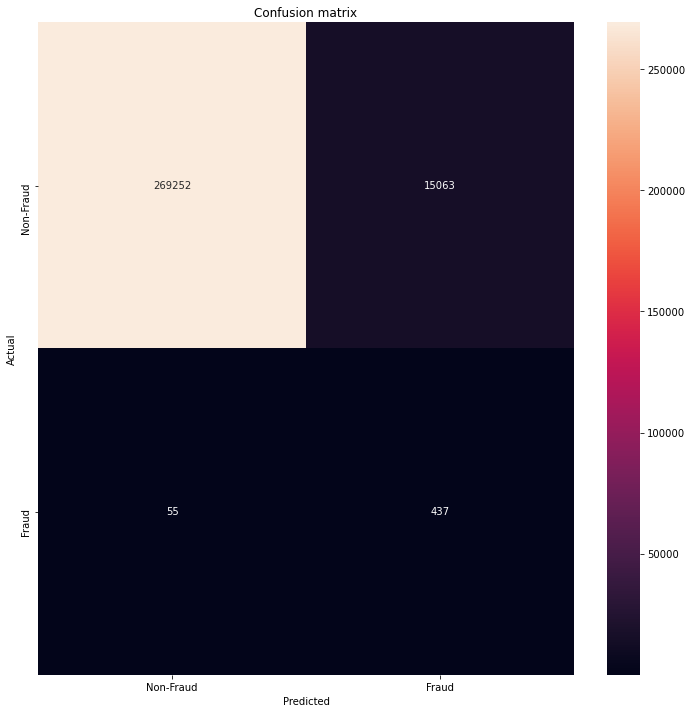

In [23]:
#Isolation Forest Implementation - small data

#Set up the algorithm
IFA = IsolationForest()

start = time.time()
#Train the model on the whole dataset
IFA.fit(small)

scores_pred = IFA.decision_function(small)

#Get the model prediction
yPred = IFA.predict(small)

#Classify the results
yPred[yPred == 1] = 0
yPred[yPred == -1] = 1

#Count the number of  values that were wrong
error = (yPred != target).sum()
end = time.time()

#Evaluate the results
accu = accuracy_score(target, yPred)
prec = precision_score(target, yPred)
recall = recall_score(target, yPred)
f1 = f1_score(target, yPred)
total = end - start

print("Isolation Forest ML Algorithm")
print("The accuracy is: ", accu)
print("The Precision is: ", prec)
print("The Recall is: ", recall)
print("The F1-Score is: ", f1)
print("\nNumber of errors: ", error)
print("\nTime elapsed in seconds: ", total)

#printing the confusion matrix for better visuals
classes = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(target, yPred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()